In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# 数据探索EDA

In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train.shape

(10886, 12)

In [5]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [7]:
df_train['weekday'] = pd.DatetimeIndex(df_train.datetime).dayofweek

In [8]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month

## 因变量的分布，我在想，既然registered的分布那么类似于count，那么我们是不是可以分别预测出registered和casual，然后1.2registered+0.8casual=count？

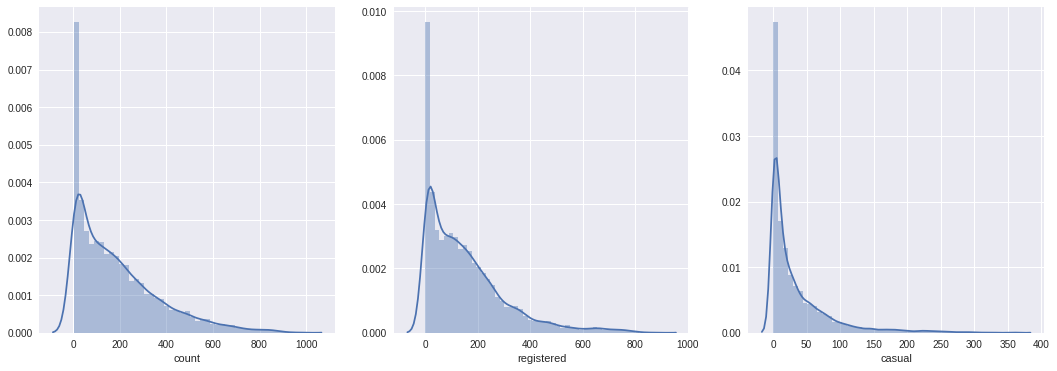

In [16]:
fig,axes = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(18, 6)
sns.distplot(df_train['count'],ax=axes[0])
sns.distplot(df_train['registered'],ax=axes[1])
sns.distplot(df_train['casual'],ax=axes[2])

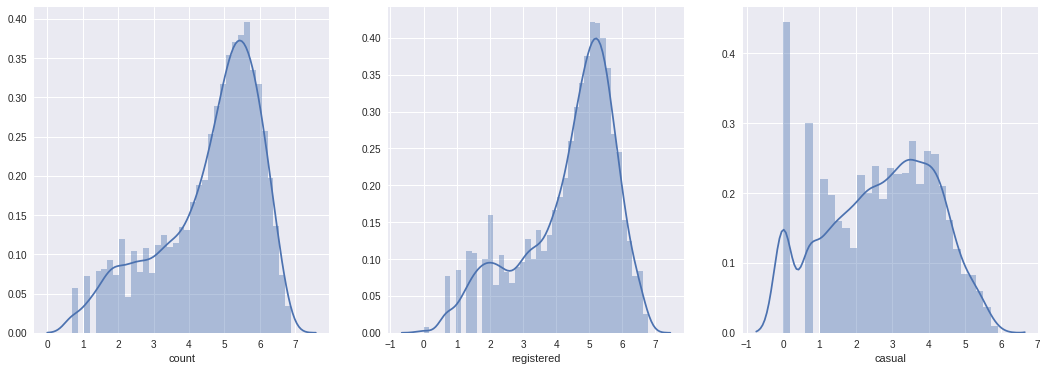

In [17]:
fig,axes = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(18, 6)
sns.distplot(np.log(df_train['count']+1),ax=axes[0])
sns.distplot(np.log(df_train['registered']+1),ax=axes[1])
sns.distplot(np.log(df_train['casual']+1),ax=axes[2])

从分布图中我们可以看到，很很多离群点，不服从分布，我们应该通过剔除离群点修正因变量的分布

In [18]:
df_train = df_train[np.abs(df_train["casual"]-df_train["casual"].mean())<=(0.7*df_train["casual"].std())] 

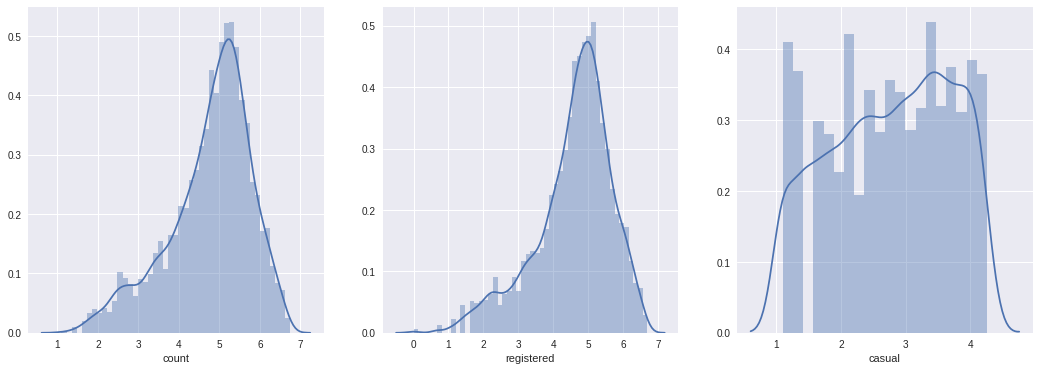

In [19]:
fig,axes = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(18, 6)
sns.distplot(np.log(df_train['count']+1),ax=axes[0])
sns.distplot(np.log(df_train['registered']+1),ax=axes[1])
sns.distplot(np.log(df_train['casual']+1),ax=axes[2])

通过删除casual的离群点，我们把因变量的分布修正了（非常完美的修正）,但是感觉修正过分了，样本数变得很少

((array([-3.73882821, -3.50960994, -3.38357397, ...,  3.38357397,
          3.50960994,  3.73882821]),
  array([ 1.09861229,  1.09861229,  1.09861229, ...,  4.26267988,
          4.26267988,  4.26267988])),
 (0.90816839082955148, 2.7694952707150184, 0.97600669038134391))

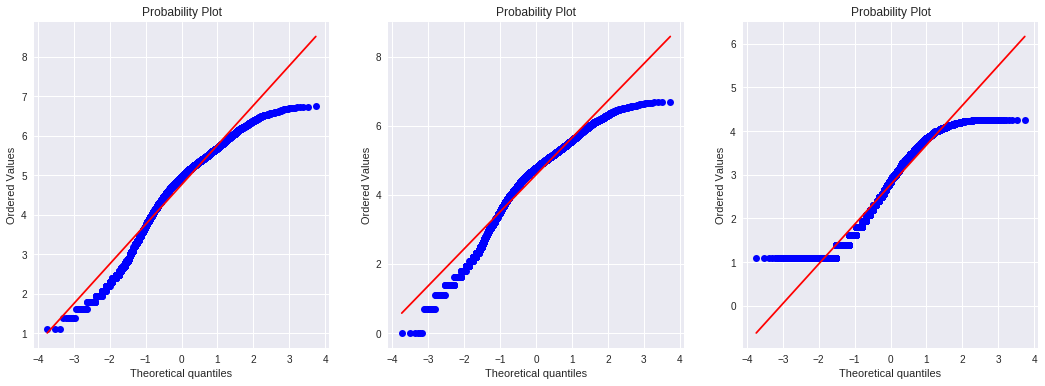

In [20]:
fig,axes = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(18, 6)
stats.probplot(np.log(df_train["count"]+1), dist='norm', fit=True, plot=axes[0])
stats.probplot(np.log(df_train["registered"]+1), dist='norm', fit=True, plot=axes[1])
stats.probplot(np.log(df_train["casual"]+1), dist='norm', fit=True, plot=axes[2])

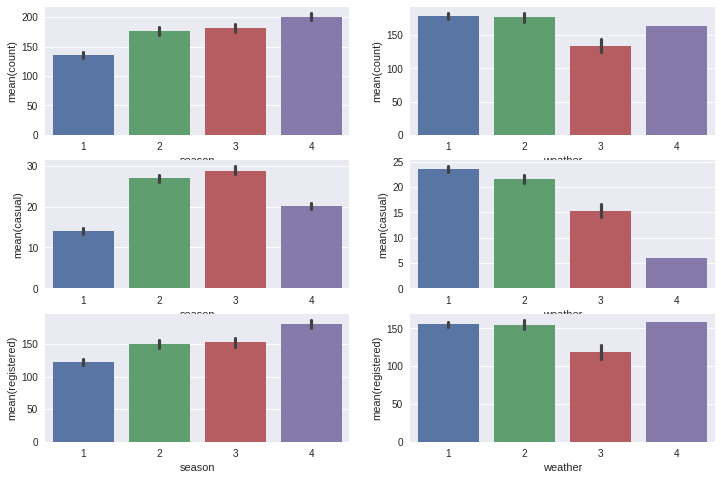

In [21]:
#对比season、weather这两个特征对casual、registered、count的影响
fig,axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,8)
sns.barplot(x="season", y="count", data=df_train, ax=axes[0][0])
sns.barplot(x="weather", y="count", data=df_train, ax=axes[0][1])
sns.barplot(x="season", y="casual", data=df_train, ax=axes[1][0])
sns.barplot(x="weather", y="casual", data=df_train, ax=axes[1][1])
sns.barplot(x="season", y="registered", data=df_train, ax=axes[2][0])
sns.barplot(x="weather", y="registered", data=df_train, ax=axes[2][1])

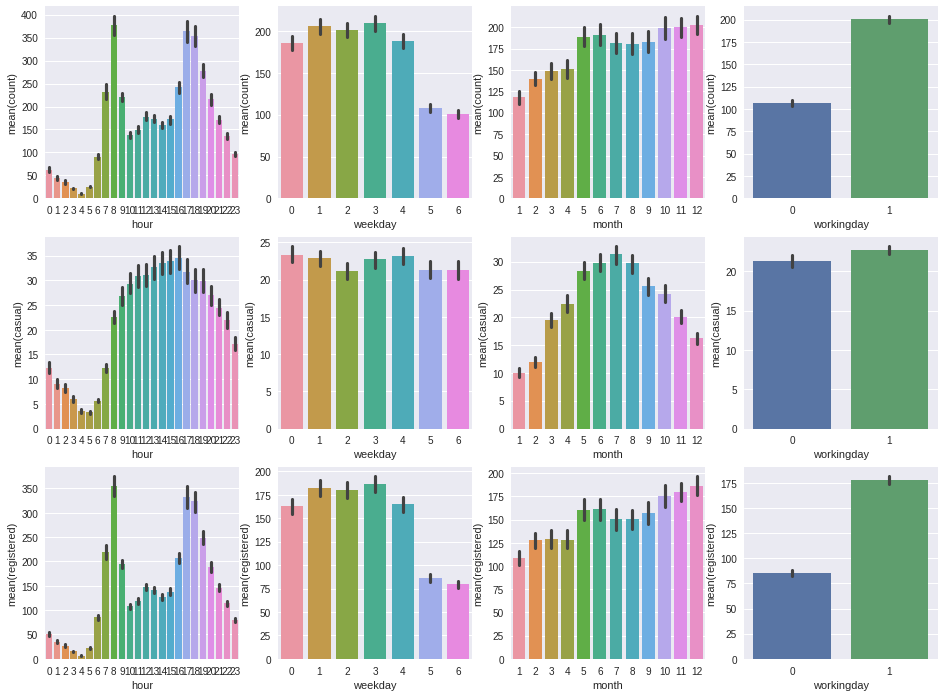

In [22]:
fig,axes = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(16,12)
sns.barplot(x="hour", y="count", data=df_train, ax=axes[0][0])
sns.barplot(x="weekday", y="count", data=df_train, ax=axes[0][1])
sns.barplot(x="month", y="count", data=df_train, ax=axes[0][2])
sns.barplot(x="workingday", y="count", data=df_train, ax=axes[0][3])

sns.barplot(x="hour", y="casual", data=df_train, ax=axes[1][0])
sns.barplot(x="weekday", y="casual", data=df_train, ax=axes[1][1])
sns.barplot(x="month", y="casual", data=df_train, ax=axes[1][2])
sns.barplot(x="workingday", y="casual", data=df_train, ax=axes[1][3])

sns.barplot(x="hour", y="registered", data=df_train, ax=axes[2][0])
sns.barplot(x="weekday", y="registered", data=df_train, ax=axes[2][1])
sns.barplot(x="month", y="registered", data=df_train, ax=axes[2][2])
sns.barplot(x="workingday", y="registered", data=df_train, ax=axes[2][3])

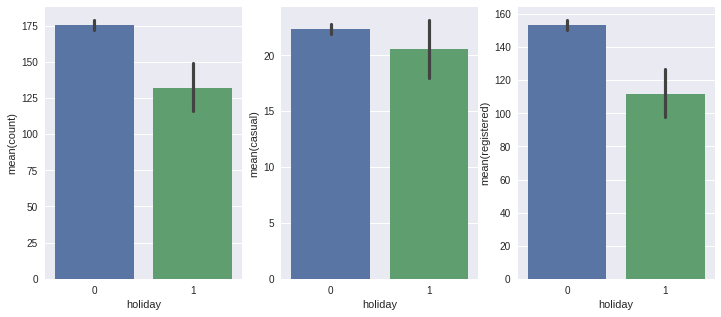

In [23]:
fig,axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12,5)
sns.barplot(x="holiday", y="count", data=df_train, ax=axes[0])
sns.barplot(x="holiday", y="casual", data=df_train, ax=axes[1])
sns.barplot(x="holiday", y="registered", data=df_train, ax=axes[2])

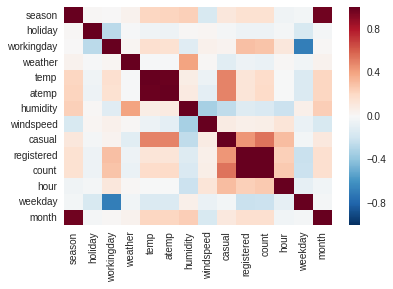

In [24]:
sns.heatmap(df_train.corr())

从图中我们可以看到season和month相关性很强，二取一 <br>
temp和atemp相关性很强，二取一 <br>